In [1]:
# Data processing
import pandas as pd
import numpy as np
# import scipy.stats

# Visualization
import seaborn as sb

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

# # Other
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

c:\Users\jljoa\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jljoa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jljoa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ratings = pd.read_csv("../archive/rating_complete.csv")
ratings

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [3]:
anime_df = pd.read_csv("../archive/anime.csv")
anime_df["anime_id"] = anime_df["MAL_ID"]
anime_df = anime_df.drop(columns={"MAL_ID","English name","Aired","Premiered","Producers","Licensors","Studios","Source","Rating","Ranked", "Japanese name"})
anime_df

,Name,Score,Genres,Type,Episodes,Duration,Popularity,Members,Favorites,Watching,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,24 min. per ep.,39,1251960,61971,105808,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,1 hr. 55 min.,518,273145,1174,4143,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,24 min. per ep.,201,558913,12944,29113,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,25 min. per ep.,1467,94683,587,4300,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,23 min. per ep.,4369,13224,18,642,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",ONA,Unknown,Unknown,13116,354,6,0,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481
17558,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",TV,Unknown,Unknown,17562,7010,70,14,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483
17559,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",TV,Unknown,Unknown,17558,11309,48,3,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48488
17560,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",TV,Unknown,Unknown,17565,1386,2,13,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48491


In [4]:
df_merged = pd.merge(ratings, anime_df, on="anime_id", how="inner")
df = df_merged

In [5]:
df=df.sample(frac=0.01)
df = df.groupby("user_id").filter(lambda x: len(x) > 10) # 310059
df

,user_id,anime_id,rating,Name,Score,Genres,Type,Episodes,Duration,Popularity,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
55768286,310955,2321,8,Giant Robo the Animation: Chikyuu ga Seishi Su...,7.84,"Action, Sci-Fi, Super Power, Drama, Mecha, Sho...",OVA,7,49 min. per ep.,3568,...,1000.0,1284.0,1594.0,1113.0,601.0,275.0,127.0,60.0,25.0,31.0
43041862,275011,30891,6,Oni Chichi: Refresh♥,6.91,Hentai,OVA,4,18 min. per ep.,4186,...,856.0,539.0,1073.0,1611.0,946.0,561.0,237.0,133.0,88.0,129.0
39738122,207356,90,7,Mobile Suit Gundam Wing,7.72,"Action, Military, Sci-Fi, Space, Drama, Mecha",TV,49,24 min. per ep.,1118,...,9965.0,13704.0,21396.0,18315.0,7559.0,3460.0,1507.0,518.0,210.0,175.0
40850706,323895,35639,10,Just Because!,7.29,"Slice of Life, Drama, Romance, School",TV,12,23 min. per ep.,675,...,5312.0,10515.0,24378.0,28201.0,12813.0,5884.0,2405.0,844.0,417.0,381.0
48628523,243053,2520,6,Dragon Ball Specials,6.73,"Fantasy, Comedy, Super Power, Shounen",Special,2,12 min. per ep.,3274,...,1463.0,867.0,1626.0,3020.0,2658.0,1727.0,593.0,237.0,140.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41597225,352278,30123,9,Akagami no Shirayuki-hime,7.79,"Fantasy, Romance, Drama, Shoujo",TV,12,24 min. per ep.,284,...,27114.0,39669.0,69959.0,57305.0,21729.0,9150.0,2536.0,877.0,420.0,342.0
18407406,185308,158,8,Maria-sama ga Miteru,7.34,"Slice of Life, Drama, Romance, Shoujo, Shoujo Ai",TV,13,24 min. per ep.,2170,...,1570.0,2405.0,4446.0,4901.0,2611.0,1342.0,521.0,234.0,105.0,142.0
50952984,36365,41345,6,Noblesse,6.83,"Action, Supernatural, Vampire, School",TV,13,23 min. per ep.,933,...,4118.0,4520.0,9605.0,16362.0,11212.0,6036.0,3308.0,1520.0,724.0,664.0
45334858,342419,1913,7,Shonan Junai Gumi!,7.48,"Action, Comedy, School",OVA,5,46 min. per ep.,2730,...,1611.0,2137.0,4016.0,4429.0,1982.0,783.0,239.0,134.0,44.0,44.0


In [6]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_recommenders as tfrs


In [7]:
df = df.drop(columns={"Name","Genres","Duration","Type"})
# df_one_hot = pd.get_dummies(df)
# df_one_hot

In [8]:
df.dtypes
# df["Score"]
df = df.drop(columns={"Score", "Episodes", "Score-10","Score-9","Score-8","Score-7","Score-6","Score-5","Score-4","Score-3","Score-2","Score-1"})
df

,user_id,anime_id,rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
55768286,310955,2321,8,3568,21071,404,921,7042,741,464,11903
43041862,275011,30891,6,4186,14804,62,3149,6863,1078,543,3171
39738122,207356,90,7,1118,132208,2538,5922,95155,5945,4411,20775
40850706,323895,35639,10,675,218640,1056,16249,106606,6688,10766,78331
48628523,243053,2520,6,3274,25108,39,340,20660,215,258,3635
...,...,...,...,...,...,...,...,...,...,...,...
41597225,352278,30123,9,284,459085,5657,26374,289725,16445,17453,109088
18407406,185308,158,8,2170,53511,663,2234,22274,1941,2716,24346
50952984,36365,41345,6,933,158196,1011,30371,55554,4124,13475,54672
45334858,342419,1913,7,2730,35277,141,1592,19042,1054,745,12844


### Visualization

<AxesSubplot:title={'center':'Correlation of Movie Features\n'}>

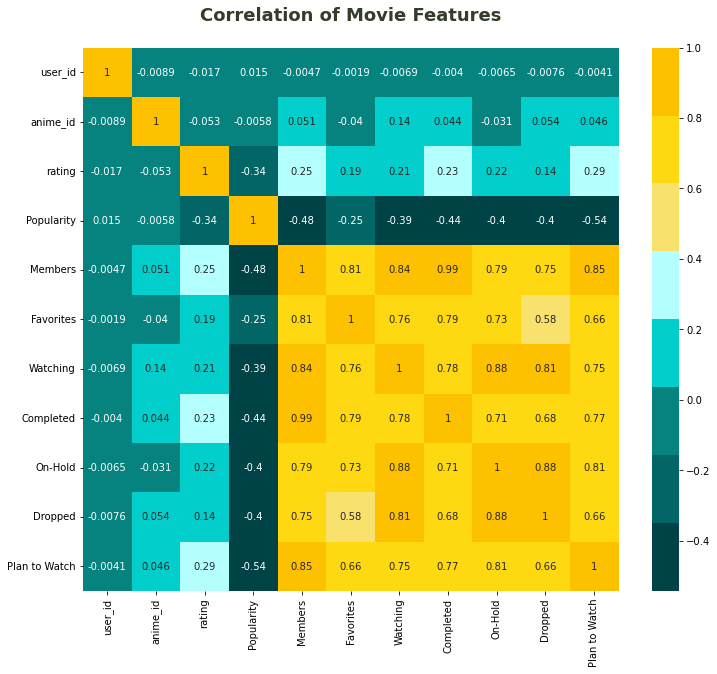

In [9]:
import seaborn as sns
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(df.corr(), annot=True, cmap=['#004346', '#036666', '#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

In [10]:
df['user_id'].unique().astype(str)
# map
# tf.convert_to_tensor(df['user_id'].unique())

df_NN = df.drop(columns={"Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch"})

In [11]:
df_NN

,user_id,anime_id,rating
55768286,310955,2321,8
43041862,275011,30891,6
39738122,207356,90,7
40850706,323895,35639,10
48628523,243053,2520,6
...,...,...,...
41597225,352278,30123,9
18407406,185308,158,8
50952984,36365,41345,6
45334858,342419,1913,7


### Predictions

In [12]:
y = df_NN["rating"]
# X = df_NN.loc[:, df.columns != "rating"] # All columns besides 'charges'
X = df_NN.drop(columns={"rating"})
# X

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(81627, 65301, 16326)

In [14]:
X_train.info
X_train.loc[X_train["user_id"] == 35485], X_test.loc[X_test["user_id"] == 35485]

(          user_id  anime_id
 57575643    35485     37854
 57526569    35485     39780
 53376924    35485      5324
 57170423    35485     32039
 57415221    35485     24109
 39435907    35485      5262
 56759064    35485      7026
 36942475    35485      4789
 56574214    35485     40799
 43484688    35485     32264
 56519261    35485      4890
 56808190    35485     19209
 50000407    35485     31143
 37248633    35485     17635
 50273171    35485       746
 57573761    35485     17697
 57512672    35485     39782
 55147681    35485     25291
 50940321    35485     20815
 56296444    35485      3902
 50288007    35485       752
 54305361    35485     37406
 44716304    35485     19365,
           user_id  anime_id
 53102266    35485     33046
 56460656    35485     29293
 26307826    35485      6802
 57248318    35485     18561
 57592516    35485      9862
 56498453    35485     35979
 56465395    35485     28305)

### Neural Network with Embeddings

In [15]:
animes_ds = tf.data.Dataset.from_tensor_slices(df_NN["anime_id"].values)
# list(dataset.as_numpy_iterator())
# target = df_NN.pop('rating')
# dataset = tf.data.Dataset.from_tensor_slices(dict(df_NN))
dataset = tf.data.Dataset.from_tensor_slices(df_NN[['user_id','anime_id',"rating"]].values.astype('int32'))
dataset = dataset.map(lambda x: {"user_id": x[0],"anime_id": x[1],"rating": x[2]})

unique_anime_ids = np.unique(np.concatenate(list(tf.data.Dataset.from_tensor_slices(df_NN[['anime_id']].values.astype('int32')).batch(1000))))
unique_user_ids = np.unique(np.concatenate(list(tf.data.Dataset.from_tensor_slices(df_NN[['user_id']].values.astype('int32')).batch(1_000))))

for i in dataset:
    print(i["anime_id"])
    break

# print(len(unique_anime_ids),len(unique_user_ids))
# len(tf.convert_to_tensor(df['user_id'].unique())),len(tf.convert_to_tensor(df['anime_id'].unique()))

tf.Tensor(2321, shape=(), dtype=int32)


In [16]:
class UserModel(tf.keras.Model):

  def __init__(self, use_timestamps):
    super().__init__()

    self._use_timestamps = use_timestamps

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(vocabulary=df['user_id'].unique().astype('int32')),
        # tf.keras.layers.StringLookup(
        #     vocabulary=tf.convert_to_tensor(df['user_id'].unique().astype(str)), mask_token=None),
        tf.keras.layers.Embedding(len(df["user_id"].unique()) + 1, 32),
    ])


  def call(self, inputs):
    if not self._use_timestamps:
      return self.user_embedding(inputs["user_id"])

    return tf.concat([
        self.user_embedding(inputs["user_id"]),
    ], axis=1)

In [17]:
class MovieModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    max_tokens = 10_000

    self.title_embedding = tf.keras.Sequential([
      # tf.keras.layers.StringLookup(
      #     vocabulary=tf.convert_to_tensor(df['anime_id'].unique().astype(str)), mask_token=None),
      tf.keras.layers.IntegerLookup(vocabulary=df['anime_id'].unique().astype('int32')),
      tf.keras.layers.Embedding(len(df["anime_id"].unique()) + 1, 32)
    ])

    # self.title_vectorizer = tf.keras.layers.TextVectorization(
    #     max_tokens=max_tokens)

    self.title_text_embedding = tf.keras.Sequential([
      # self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])

    # self.title_vectorizer.adapt(movies)

  def call(self, titles):
    return tf.concat([
        self.title_embedding(titles),
        # self.title_text_embedding(titles),
    ], axis=1)

In [18]:
import tensorflow_datasets as tfds

class MovielensModel(tfrs.models.Model):

  def __init__(self, use_timestamps):
    super().__init__()
    self.query_model = tf.keras.Sequential([
      UserModel(False),
      tf.keras.layers.Dense(64)
    ])
    self.candidate_model = tf.keras.Sequential([
      MovieModel(),
      tf.keras.layers.Dense(64)
    ])
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=animes_ds.batch(128).map(self.candidate_model),
        ),
    )
 
  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    # print("FEATURES\n" , features)
    query_embeddings = self.query_model({
        "user_id": features["user_id"],
        # "timestamp": features["timestamp"],
    })
    movie_embeddings = self.candidate_model(features["anime_id"])

    return self.task(query_embeddings, movie_embeddings)

In [19]:
tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [20]:
# # UserModel.user_embedding("29806")
# #Inspect all anime_id in cached_train
# for i in cached_train:
#     print(i["user_id"])
#     # break

In [21]:
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

model = MovielensModel(use_timestamps=False)

model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
# model.compile(optimizer=tf.keras.optimizers.Adam()) # worse (maybe bc default lr 0.01 vs 0.1?)

history = model.fit((cached_train), epochs=3)

print(history)

# train_accuracy = model.evaluate(
#     cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
# test_accuracy = model.evaluate(
#     cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

# print(f"Top-100 accuracy (train): {train_accuracy:.2f}.")
# print(f"Top-100 accuracy (test): {test_accuracy:.2f}.")

Epoch 1/3
40/40 [==============================] - 83s 2s/step - factorized_top_k/top_1_categorical_accuracy: 7.8750e-04 - factorized_top_k/top_5_categorical_accuracy: 7.8750e-04 - factorized_top_k/top_10_categorical_accuracy: 8.0000e-04 - factorized_top_k/top_50_categorical_accuracy: 0.0012 - factorized_top_k/top_100_categorical_accuracy: 0.0019 - loss: 14886.3247 - regularization_loss: 0.0000e+00 - total_loss: 14886.3247
Epoch 2/3
40/40 [==============================] - 82s 2s/step - factorized_top_k/top_1_categorical_accuracy: 5.5000e-04 - factorized_top_k/top_5_categorical_accuracy: 5.5000e-04 - factorized_top_k/top_10_categorical_accuracy: 5.6250e-04 - factorized_top_k/top_50_categorical_accuracy: 0.0019 - factorized_top_k/top_100_categorical_accuracy: 0.0034 - loss: 14791.6318 - regularization_loss: 0.0000e+00 - total_loss: 14791.6318
Epoch 3/3
40/40 [==============================] - 81s 2s/step - factorized_top_k/top_1_categorical_accuracy: 8.7500e-05 - factorized_top_k/top_5_

In [22]:
def predict_movie(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.query_model.layers[0].user_embedding)
    # recommends movies out of the entire movies dataset.
    index.index_from_dataset(
      tf.data.Dataset.zip((animes_ds.batch(100), animes_ds.batch(100).map(model.candidate_model.layers[0].title_embedding))),
    )

    # Get recommendations.
    print(index(tf.constant([int(user)])))
    _, titles = index(tf.constant([int(user)]))
    
    print('Top {} recommendations for user {}:\n'.format(top_n, user))
    for i, title in enumerate(titles[0, :top_n].numpy()):
        print('{}. {}'.format(i+1, title))

def predict_rating(user, movie):
    trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
          "userId": np.array([int(user)]),
          "original_title": np.array([movie])
      })
    print("Predicted rating for {}: {}".format(movie, predicted_rating.numpy()[0][0]))

In [23]:
predict_movie(2222, 30)

(<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09364106, 0.09364106, 0.09364106, 0.09364106, 0.09364106,
        0.09364106, 0.09364106, 0.09364106, 0.09364106, 0.09364106]],
      dtype=float32)>, <tf.Tensor: shape=(1, 10), dtype=int64, numpy=
array([[6979, 6979, 6979, 6979, 6979, 6979, 6979, 6979, 6979, 6979]],
      dtype=int64)>)
Top 30 recommendations for user 2222:

1. 6979
2. 6979
3. 6979
4. 6979
5. 6979
6. 6979
7. 6979
8. 6979
9. 6979
10. 6979


In [24]:
# Join anime_df titles to df_strings
df_strings = pd.merge(df_NN, anime_df[["anime_id", "Name"]], on="anime_id", how="inner")
df_strings = df_strings.astype(str)
df_strings = df_strings.astype({'rating': 'float32'})
df_strings = df_strings.drop(columns={"anime_id"})
df_strings.dtypes, df_strings


(user_id     object
 rating     float32
 Name        object
 dtype: object,
       user_id  rating                                               Name
 0      310955     8.0  Giant Robo the Animation: Chikyuu ga Seishi Su...
 1      137297     8.0  Giant Robo the Animation: Chikyuu ga Seishi Su...
 2      307815     8.0  Giant Robo the Animation: Chikyuu ga Seishi Su...
 3       89125     6.0  Giant Robo the Animation: Chikyuu ga Seishi Su...
 4      301523     6.0  Giant Robo the Animation: Chikyuu ga Seishi Su...
 ...       ...     ...                                                ...
 81622  292091    10.0                               Kigyou Senshi Arslan
 81623  150871     6.0                                    Megami Paradise
 81624   85472     6.0                             Anima Yell! Ouen Douga
 81625  228099     5.0             Ginga e Kickoff!!: Natsuyasumi Special
 81626   68042     6.0                                               Feed
 
 [81627 rows x 3 columns])

In [25]:
# dataset = tf.data.Dataset.from_tensor_slices(df_strings[['user_id','Name','rating']].values)
# dataset = dataset.map(lambda x: {"user_id": x[0],"Name": x[1],"rating": x[2]})
dataset = tf.data.Dataset.from_tensor_slices(dict(df_strings))

tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [26]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
        tf.keras.layers.StringLookup(vocabulary=df_strings['user_id'].unique(), mask_token=None),
        # tf.keras.layers.IntegerLookup(vocabulary=df['user_id'].unique().astype('int32')),
        tf.keras.layers.Embedding(len(df_strings["user_id"].unique()) + 1, 32),
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(vocabulary=df_strings['Name'].unique(), mask_token=None),
      # tf.keras.layers.IntegerLookup(vocabulary=df['anime_id'].unique().astype('int32')),
      tf.keras.layers.Embedding(len(df_strings["Name"].unique()) + 1, 32)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])

  def call(self, inputs):

    user_id, movie_title = inputs

    user_embedding = self.user_embeddings(user_id)
    movie_embedding = self.movie_embeddings(movie_title)

    return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

In [27]:
# RankingModel()(([42], [100]))
RankingModel()((["41638"], ["Drifters"]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.0030832]], dtype=float32)>

In [28]:
from typing import Dict, Text

task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

class MovielensModel_2(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["Name"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [29]:
model = MovielensModel_2()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [30]:
model.fit(cached_train, epochs=3)

Epoch 1/3
40/40 [==============================] - 1s 9ms/step - root_mean_squared_error: 2.6264 - loss: 6.7194 - regularization_loss: 0.0000e+00 - total_loss: 6.7194
Epoch 2/3
40/40 [==============================] - 1s 9ms/step - root_mean_squared_error: 1.6640 - loss: 2.7330 - regularization_loss: 0.0000e+00 - total_loss: 2.7330
Epoch 3/3
40/40 [==============================] - 1s 9ms/step - root_mean_squared_error: 1.4329 - loss: 2.0203 - regularization_loss: 0.0000e+00 - total_loss: 2.0203


In [31]:
model.evaluate(cached_test, return_dict=True)

1/1 [==============================] - 0s 345ms/step - root_mean_squared_error: 1.4182 - loss: 2.0112 - regularization_loss: 0.0000e+00 - total_loss: 2.0112


{'root_mean_squared_error': 1.4181674718856812,
 'loss': 2.0111989974975586,
 'regularization_loss': 0,
 'total_loss': 2.0111989974975586}

In [32]:
# 15416549	25411	889	8
# 38814016	296952	20509	8
# 43693654	169276	389	8
# 56447359	135337	36778	3
# 7558040	120943	29786	8
# ...	...	...	...
# 55324946	7179	3105	2
# 26898571	156081	22265	7
# 52778397	108616	39355	7
# 51024619	306633	35248	1
# 13658136	267303	11741	8
test_ratings = {}
test_movie_titles = [38498, 35667, 13309, 425, 34958, 35248, 11741, 3105]
for movie_title in test_movie_titles:
  test_ratings[movie_title] = model({
      "user_id": np.array([25411]),
      "anime_id": np.array([movie_title])
  })

print("Ratings:")
for title, score in sorted(test_ratings.items(), key=lambda x: x[1], reverse=True):
  print(f"{title}: {score}")

KeyError: "Exception encountered when calling layer 'movielens_model_2' (type MovielensModel_2).\n\nName\n\nCall arguments received by layer 'movielens_model_2' (type MovielensModel_2):\n  • features={'user_id': 'tf.Tensor(shape=(1,), dtype=int32)', 'anime_id': 'tf.Tensor(shape=(1,), dtype=int32)'}"

In [ ]:
# list(set(X_test["anime_id"].unique()) - set(X_test.loc[X_test["user_id"] == 35485]["anime_id"].unique()))

In [ ]:
# For user in test set, predict top 10 movies (user didnt watch) and compare to actual top 10 movies
import warnings
warnings.filterwarnings('ignore')

users_to_predict = X_test["user_id"][:10]
print("Prediciting for {} users".format(len(users_to_predict)))

test_ratings = {}

i = 0
for user in users_to_predict:
    # movies_to_predict = list(set(X_test["anime_id"].unique()) - set(X_test.loc[X_test["user_id"] == user]["anime_id"].unique()))[:10]
    movies_to_predict = X_test.loc[X_test["user_id"] == user]["anime_id"].unique()
    print("Predicting for user {} {} movies ({})".format(user, len(movies_to_predict), i )) 
    i+=1
    for movie_title in movies_to_predict:
        test_ratings[user] = {movie_title : model({
            "user_id": np.array([user]),
            "anime_id": np.array([movie_title])
        })}

print("Ratings:")
predictions_df = pd.DataFrame(columns=["user_id", "anime_id", "rating"])
for user in test_ratings.keys():
    for title, score in sorted(test_ratings[user].items(), key=lambda x: x[1], reverse=True):
        predictions_df = predictions_df.append({"user_id": int(user), "anime_id": int(title), "rating": float(score)}, ignore_index=True)
        # predictions_df = pd.concat([predictions_df, pd.DataFrame({"user_id": int(user), "anime_id": int(title), "rating": score}, index = "user_id")], ignore_index=True)
        # predictions_df = predictions_df.concat({"user_id": int(user), "anime_id": int(title), "rating": score}, ignore_index=True)
        # print(f"{title}: {score}")

predictions_df

Prediciting for 10 users
Predicting for user 317210 3 movies (0)


KeyError: "Exception encountered when calling layer 'movielens_model_2' (type MovielensModel_2).\n\nName\n\nCall arguments received by layer 'movielens_model_2' (type MovielensModel_2):\n  • features={'user_id': 'tf.Tensor(shape=(1,), dtype=int32)', 'anime_id': 'tf.Tensor(shape=(1,), dtype=int64)'}"

### Basic Neural Network


In [ ]:
model_Basic = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
model_Basic.compile(optimizer=tf.keras.optimizers.Adagrad(0.001), loss="mae", metrics=["mae"])

history = model_Basic.fit(X_train, y_train, epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001)])


Epoch 1/50
2022/2022 [==============================] - 4s 2ms/step - loss: 98.0104 - mae: 98.0104
Epoch 2/50
2022/2022 [==============================] - 4s 2ms/step - loss: 39.6442 - mae: 39.6442
Epoch 3/50
2022/2022 [==============================] - 4s 2ms/step - loss: 32.9907 - mae: 32.9907
Epoch 4/50
2022/2022 [==============================] - 4s 2ms/step - loss: 27.4829 - mae: 27.4829
Epoch 5/50
2022/2022 [==============================] - 4s 2ms/step - loss: 23.8023 - mae: 23.8023
Epoch 6/50
2022/2022 [==============================] - 4s 2ms/step - loss: 20.9052 - mae: 20.9052
Epoch 7/50
2022/2022 [==============================] - 4s 2ms/step - loss: 18.6810 - mae: 18.6810
Epoch 8/50
2022/2022 [==============================] - 4s 2ms/step - loss: 17.0777 - mae: 17.0777
Epoch 9/50
2022/2022 [==============================] - 4s 2ms/step - loss: 16.6945 - mae: 16.6945
Epoch 10/50
2022/2022 [==============================] - 4s 2ms/step - loss: 15.1708 - mae: 15.1708
Epoch 11/

In [ ]:
y_pred = model_Basic.predict(X_test)
model_Basic.evaluate(X_test,y_test), y_pred

506/506 [==============================] - 1s 1ms/step - loss: 2.8720 - mae: 2.8720


([2.8719539642333984, 2.8719539642333984],
 array([[10.140786 ],
        [10.362588 ],
        [ 9.302163 ],
        ...,
        [ 4.734841 ],
        [ 5.1521077],
        [ 4.5121846]], dtype=float32))

Text(0.5, 0, 'epochs')

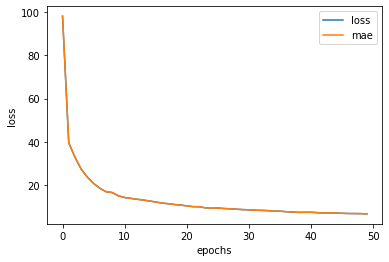

In [ ]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Eval Neural Network results predictions

In [ ]:
# print(y_train.median(), y_train.mean())
# print(y_test.median(), y_test.mean())
# print(y_pred.median(), y_pred.mean())

Text(0.5, 0, 'epochs')

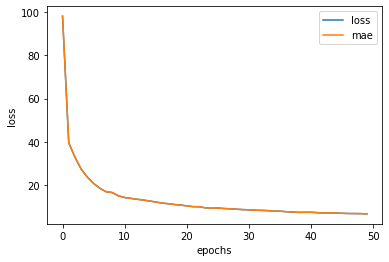

In [ ]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

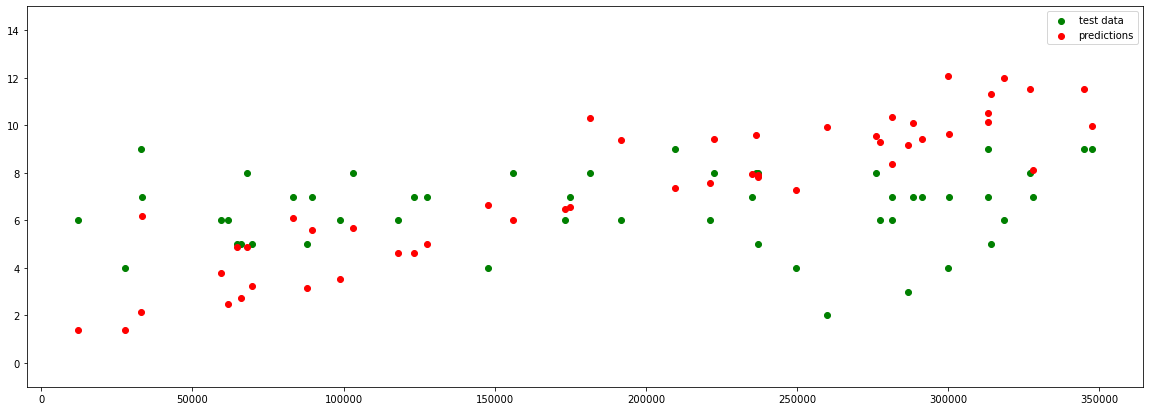

In [ ]:
NUMBER_TO_PLOT = 50
plt.figure(figsize=(20,7))
# plt.scatter(X_train["user_id"][:NUMBER_TO_PLOT], y_train[:NUMBER_TO_PLOT], c="b", label="train data")
plt.scatter(X_test["user_id"][:NUMBER_TO_PLOT], y_test[:NUMBER_TO_PLOT], c='g', label="test data")
plt.scatter(X_test["user_id"][:NUMBER_TO_PLOT], tf.squeeze(y_pred)[:NUMBER_TO_PLOT], c="r", label="predictions")
plt.ylim(-1, 15)

plt.legend()